In [1]:
!pip install seaborn

     |████████████████████████████████| 292 kB 7.8 MB/s            


/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

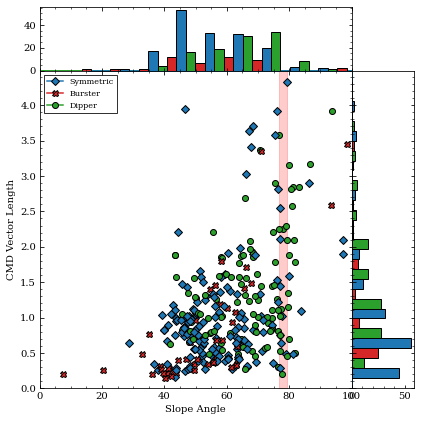

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator


def plot_diagram(results, y):
    m = pd.read_csv("https://raw.githubusercontent.com/HarritonResearchLab/NAPYSOs/main/recovered/2.0/efforts/september21/fixing_m/new_ms.csv")

    try:
        results.set_index("star Identifier", inplace = True)
    except:
        print("Already index")
    m.set_index("ID", inplace = True)

    results = m.join(results)

    #results["angle"] = results["angle"] * 360/(2*3.14159)

    significant = results[results["angle error"] < 10]
    significant.loc[significant["angle"] < 0, "angle"] = significant[significant["angle"] < 0]["angle"] + 180
    #significant = significant[significant["angle"] > 0]

    significant["Categories"] = 0
    #Multiple stars with different slopes
    significant = significant.reset_index()
    for i in significant.index:
        m = significant.loc[i, "new_m"]
        
        if m < -0.25:
            significant.loc[i, "Categories"] = "Burster"

        elif m > -0.25 and m < 0.25:
            significant.loc[i, "Categories"] = "Symmetric"

        elif m >0.25:
            significant.loc[i, "Categories"] = "Dipper"


    #colors = ["#408ee0", "#89bff8 ", "#0051a2"]
    #colors = [[64/255, 142/255, 224/255], [104/255, 64/255, 224/255], [64/255, 224/255, 147/255]]
    palette = {"Burster": "tab10 brown",
               "Symmetric": "tab10 orange",
               "Dipper": "tab10 purple"}
    #colors = [#8c564b,  #ff7f0e, #9467bd]
    colors = [ [31/255, 119/255, 180/255],[44/255, 160/255, 44/255],  [214/255, 39/255, 40/255]]
    sns.set_palette(sns.color_palette(colors))


    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['mathtext.fontset'] = 'dejavuserif'

    significant["CMD Angle (degrees)"] = significant["angle"]
    

    p = sns.jointplot( data = significant, x = "CMD Angle (degrees)", y =  "pythag" , space = 0, hue = "Categories", height = 6, edgecolor = "black")#, markers = {"Burster" : "s", "Dipper" : "X", "Symmetric" : "+"}) # marker = ["o", "X", "D"])#, style = significant["Categories"] )
    #p.fig.set_figwidth(6)
    #p.fig.set_figheight(4)
    #p.fig.suptitle(percent + " Middle fit")
    #p.fig.subplots_adjust(top=0.92) # Reduce plot to make room
    
    p.ax_joint.cla()
    labels = []
    label = False
    for i in significant.index:
        color = [44/255, 160/255, 44/255]
        marker = "o"
        if significant.loc[i, "Categories"] == "Burster":
            color =  [214/255, 39/255, 40/255]
            marker = "X"
            if "Burster" not in labels:
                labels.append("Burster")
                label = True
        elif significant.loc[i, "Categories"] == "Symmetric":
            color =  [31/255, 119/255, 180/255]
            marker = "D"
            if "Symmetric" not in labels:
                labels.append("Symmetric")
                label = True
        else:
            if "Dipper" not in labels:
                labels.append("Dipper")
                label = True
        if label:   
            p.ax_joint.plot(significant.loc[i, "CMD Angle (degrees)"] , significant.loc[i, "pythag"], color=color, marker=marker, mec = "black", label = labels[len(labels)-1])
        else:
            p.ax_joint.plot(significant.loc[i, "CMD Angle (degrees)"] , significant.loc[i, "pythag"], color=color, marker=marker, mec = "black")
            
        label = False
    
    
        #NEED TO ADD LEGEND


    

    bursters = significant[significant["Categories"] == "Burster"]
    symetric = significant[significant["Categories"] == "Symmetric"]
    dipper = significant[significant["Categories"] == "Dipper"]

    p.ax_marg_x.hist([symetric["angle"], dipper["angle"], bursters["angle"]], histtype = "bar", rwidth = 1, edgecolor = "black")
    p.ax_marg_y.hist([ symetric[y], dipper[y], bursters[y]], histtype = "bar", orientation = "horizontal",rwidth = 1, edgecolor = "black")

    #p.ax_joint.errorbar(dipper["Slope Angle"], dipper["Vector Length"], xerr = dipper["SLOPE_ANGLE_ERROR"], lw = 0, elinewidth = 1, color = "orange")

    #p.ax_joint.axvline(74.141, color = "black", ls = "--")
    #p.ax_joint.axvline(76.293, color = "black", ls = "--")
    #p.ax_joint = sns.scatterplot(significant["CMD Angle (degrees)"], significant["pythag"] ,  markers = {"Burster" : "s", "Dipper" : "X", "Symmetric" : "+"})

    p.ax_joint.set_xlim([0, 100.01])
    p.ax_joint.set_ylim([0,4.49])
    

    #p.ax_joint.text(71.141,2.7, "lower reddening", rotation = "vertical", va = "top", color = "tomato", weight = "bold")
    #p.ax_joint.text(76.293,2.7, "upper reddening", rotation = "vertical", va = "top", color = "tomato", weight = "bold")
    p.ax_joint.fill_between([76.6, 79.2], [5, 5], color = "red", alpha = 0.2)

    #p.ax_joint.text(90, 1.8, "bluer\nwhen\nfainter", color = "blue")
    #p.ax_joint.text(90, 0.5, "redder\nwhen\nfainter", color = "tomato")
    #p.ax_joint.arrow(102.5, 1.8, width = 1, dx = 0, dy = 0.3, overhang = 0, head_length = 0.1, color = "blue")
    #p.ax_joint.arrow(102.5, 0.8, width = 1, dx = 0, dy = -0.3, overhang = 0, head_length = 0.1, color = "tomato", head_starts_at_zero = False)


    p.ax_marg_y.tick_params(labeltop=True)
    p.ax_marg_x.tick_params(labelleft=True)

    p.ax_marg_y.spines["top"].set_visible(True)
    p.ax_marg_y.spines["bottom"].set_visible(True)
    p.ax_marg_y.spines["right"].set_visible(True)

    p.ax_marg_x.spines["left"].set_visible(True)
    p.ax_marg_x.spines["top"].set_visible(True)
    p.ax_marg_x.spines["right"].set_visible(True)

    p.ax_marg_y.axes.tick_params(axis='both',which='both',direction='in')
    p.ax_marg_y.axes.tick_params(which='both',bottom=True,top=True,left=True,right=True)
    p.ax_marg_y.axes.xaxis.set_minor_locator(AutoMinorLocator())
    p.ax_marg_y.axes.yaxis.set_minor_locator(AutoMinorLocator())
    p.ax_marg_y.axes.xaxis.tick_bottom()

    p.ax_marg_x.axes.tick_params(axis='both',which='both',direction='in')
    p.ax_marg_x.axes.tick_params(which='both',bottom=True,top=True,left=True,right=True)
    p.ax_marg_x.axes.xaxis.set_minor_locator(AutoMinorLocator())
    p.ax_marg_x.axes.yaxis.set_minor_locator(AutoMinorLocator())

    p.ax_joint.axes.tick_params(axis='both',which='both',direction='in')
    p.ax_joint.axes.tick_params(which='both',bottom=True,top=True,left=True,right=True)
    p.ax_joint.axes.tick_params(labelbottom=True,labeltop=False,labelleft=True,labelright=False)
    p.ax_joint.axes.xaxis.set_minor_locator(AutoMinorLocator())
    p.ax_joint.axes.yaxis.set_minor_locator(AutoMinorLocator())

    #p.ax_joint.axes.set_xticklabels([0, 10, 20, 30, 40, 50, 60, 70, 80])

    p.ax_joint.legend(loc='upper left',fontsize=8,fancybox=False,edgecolor='black',shadow=False)
    p.ax_joint.set_xlabel("Slope Angle")
    p.ax_joint.set_ylabel("CMD Vector Length")
    #plt.savefig(fname='/Users/owlester12/Downloads/' + percent + " " + y,dpi=200)
    plt.savefig(fname = "Vector Length vs Angle", dpi = 200)
    #plt.show()

results95 = pd.read_csv("https://raw.githubusercontent.com/HarritonResearchLab/NAPYSOs/main/referee_changes/odr-redux/odr_results.csv")
#results95 = pd.read_csv("/Users/s014605/Downloads/APRIL-22nd.csv")
#Don't have 95%
#No x spread either
#plot_diagram(results100, "100%", "x spread")
#plot_diagram(results95, "95%", "x spread")
plot_diagram(results95,  "pythag")


#Save the figures



Code I got from stack overflow showing how to add markers to jointplot. 

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


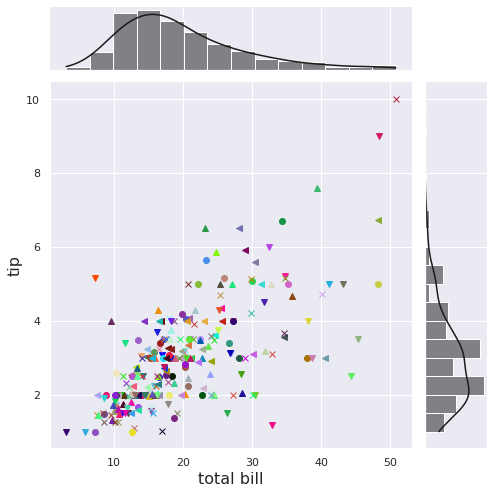

In [35]:
import seaborn as sns
from itertools import product
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
color = sns.color_palette()[5]
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg", 
                  xlim=(0, 60), ylim=(0, 12), color='k', size=7)

#Clear the axes containing the scatter plot
g.ax_joint.cla()

#Generate some colors and markers
colors = np.random.random((len(tips),3))
markers = ['x','o','v','^','<']*100

#Plot each individual point separately
for i,row in enumerate(tips.values):
    g.ax_joint.plot(row[0], row[1], color=colors[i], marker=markers[i])

g.set_axis_labels('total bill', 'tip', fontsize=16)
